In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv('/content/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21831 entries, 0 to 21830
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21831 non-null  object 
 1   Address        21831 non-null  object 
 2   Rooms          21831 non-null  int64  
 3   Type           21831 non-null  object 
 4   Price          17001 non-null  float64
 5   Method         21831 non-null  object 
 6   SellerG        21831 non-null  object 
 7   Date           21831 non-null  object 
 8   Distance       21831 non-null  float64
 9   Postcode       21831 non-null  int64  
 10  Bedroom2       17545 non-null  float64
 11  Bathroom       17544 non-null  float64
 12  Car            17466 non-null  float64
 13  Landsize       16632 non-null  float64
 14  BuildingArea   9241 non-null   float64
 15  YearBuilt      10654 non-null  float64
 16  CouncilArea    21830 non-null  object 
 17  Lattitude      17696 non-null  float64
 18  Longti

In [8]:
df.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,4830
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [9]:
df.drop(['BuildingArea','YearBuilt', 'Lattitude','Longtitude','Regionname','Date'],axis=1,inplace=True)

In [10]:
df['Price']= df['Price'].fillna(df['Price'].mean())

df['Bathroom']= df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['Landsize']= df['Landsize'].fillna(df['Landsize'].mean())

In [11]:
df['Postcode']= df['Postcode'].fillna(df['Postcode'].mode()[0])
df['Propertycount']= df['Propertycount'].fillna(df['Propertycount'].mode()[0])
df['CouncilArea']= df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])
df['Car']= df['Car'].fillna(0)

In [12]:
df['Distance']= df['Distance'].fillna(df['Distance'].mean())
df['Bedroom2']= df['Bedroom2'].fillna(df['Bedroom2'].mode()[0])
df.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Distance,0
Postcode,0
Bedroom2,0


In [13]:
df.drop(['Address'],axis=1,inplace=True)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'Propertycount'}>]], dtype=object)

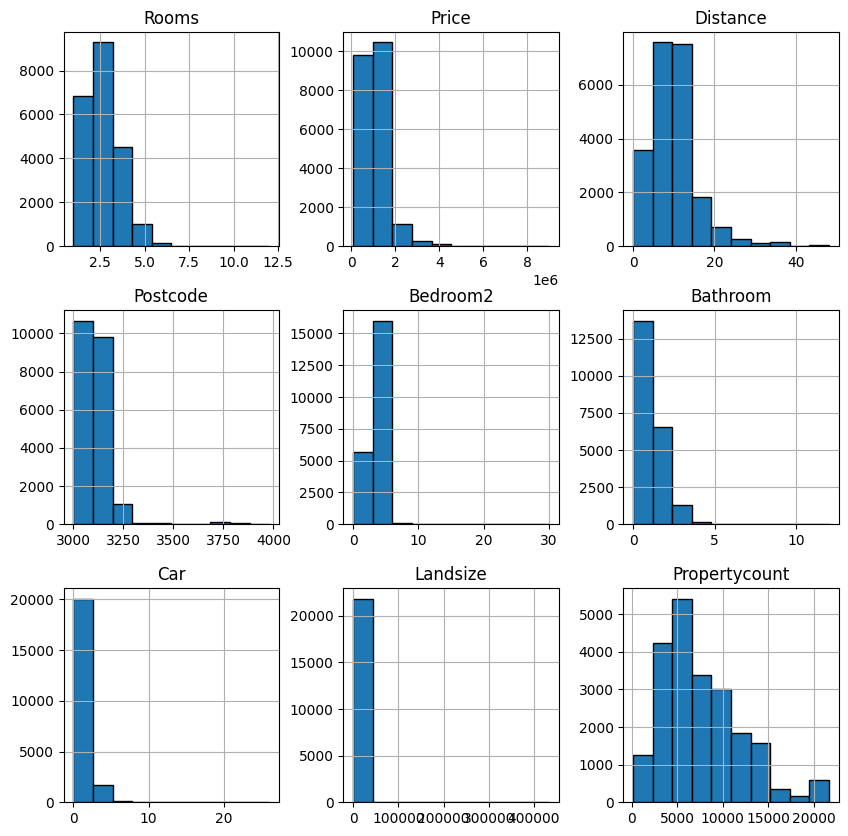

In [14]:
df.hist(bins=10,edgecolor='black',figsize=(10,10))

In [15]:
df= pd.get_dummies(df,columns=['Type','Method'],drop_first=True)
df

,Suburb,Rooms,Price,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Type_t,Type_u,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,Abbotsford,2,1.058475e+06,Jellis,2.5,3067,2.0,1.0,1.0,126.000000,...,False,False,False,False,False,False,False,True,False,False
1,Abbotsford,2,1.480000e+06,Biggin,2.5,3067,2.0,1.0,1.0,202.000000,...,False,False,False,True,False,False,False,False,False,False
2,Abbotsford,2,1.035000e+06,Biggin,2.5,3067,2.0,1.0,0.0,156.000000,...,False,False,False,True,False,False,False,False,False,False
3,Abbotsford,3,1.058475e+06,Rounds,2.5,3067,3.0,2.0,1.0,0.000000,...,False,True,False,False,False,False,False,False,True,False
4,Abbotsford,3,1.465000e+06,Biggin,2.5,3067,3.0,2.0,0.0,134.000000,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,Doncaster East,4,1.320000e+06,Jellis,14.3,3109,4.0,3.0,2.0,654.000000,...,False,False,False,False,False,False,True,False,False,False
21827,Doncaster East,3,9.000000e+05,Jellis,14.3,3109,3.0,2.0,2.0,546.073593,...,False,False,False,False,False,False,False,False,True,False
21828,Doncaster East,4,1.058475e+06,Barry,14.3,3109,4.0,2.0,2.0,911.000000,...,False,False,False,True,False,False,False,False,False,False
21829,Doncaster East,3,1.058475e+06,Ray,14.3,3109,3.0,2.0,1.0,777.000000,...,False,False,False,False,False,False,True,False,False,False


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Suburb'] = le.fit_transform(df['Suburb'])
df['SellerG'] = le.fit_transform(df['SellerG'])
df['CouncilArea'] = le.fit_transform(df['CouncilArea'])
df

,Suburb,Rooms,Price,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Type_t,Type_u,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,0,2,1.058475e+06,131,2.5,3067,2.0,1.0,1.0,126.000000,...,False,False,False,False,False,False,False,True,False,False
1,0,2,1.480000e+06,28,2.5,3067,2.0,1.0,1.0,202.000000,...,False,False,False,True,False,False,False,False,False,False
2,0,2,1.035000e+06,28,2.5,3067,2.0,1.0,0.0,156.000000,...,False,False,False,True,False,False,False,False,False,False
3,0,3,1.058475e+06,247,2.5,3067,3.0,2.0,1.0,0.000000,...,False,True,False,False,False,False,False,False,True,False
4,0,3,1.465000e+06,28,2.5,3067,3.0,2.0,0.0,134.000000,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,108,4,1.320000e+06,131,14.3,3109,4.0,3.0,2.0,654.000000,...,False,False,False,False,False,False,True,False,False,False
21827,108,3,9.000000e+05,131,14.3,3109,3.0,2.0,2.0,546.073593,...,False,False,False,False,False,False,False,False,True,False
21828,108,4,1.058475e+06,20,14.3,3109,4.0,2.0,2.0,911.000000,...,False,False,False,True,False,False,False,False,False,False
21829,108,3,1.058475e+06,230,14.3,3109,3.0,2.0,1.0,777.000000,...,False,False,False,False,False,False,True,False,False,False


In [17]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
from sklearn.model_selection import train_test_split
x= df.drop('Price',axis=1)
y= df['Price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [19]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#linear regression


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression → MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print("Mean Absolute Error (MAE):", mae)

Linear Regression → MSE: 231542346592.72, R²: 0.34
Mean Absolute Error (MAE): 307938.42266785767


#L1 regularization

In [24]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso )
mae = mean_absolute_error(y_test, y_pred_lasso )
r2_lasso = r2_score(y_test, y_pred_lasso )

print(f"Linear Regression → MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}")
print("Mean Absolute Error (MAE):", mae)

Linear Regression → MSE: 231541656884.20, R²: 0.34
Mean Absolute Error (MAE): 307937.9944072975


#L2 regularization

In [26]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred_ridge )
mae = mean_absolute_error(y_test, y_pred_ridge )
r2_ridge = r2_score(y_test, y_pred_ridge )

print(f"Linear Regression → MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")
print("Mean Absolute Error (MAE):", mae)


Linear Regression → MSE: 231541320851.75, R²: 0.34
Mean Absolute Error (MAE): 307935.9454070358


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Random Forest best params:", rf_grid.best_params_)
print("Best R² score:", rf_grid.best_score_)


Random Forest best params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score: 0.5529047625778841


In [28]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Decision Tree best params:", dt_grid.best_params_)
print("Best R² score:", dt_grid.best_score_)


Decision Tree best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R² score: 0.4695129433815296


In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean']
}

knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("KNN best params:", knn_grid.best_params_)
print("Best R² score:", knn_grid.best_score_)


KNN best params: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
Best R² score: 0.4559897565051023


In [30]:
from sklearn.svm import SVR

svr_params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', n_jobs=-1)
svr_grid.fit(X_train, y_train)

print("SVR best params:", svr_grid.best_params_)
print("Best R² score:", svr_grid.best_score_)


SVR best params: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Best R² score: 0.10417979017694876


In [31]:
best_model=rf_grid.best_estimator_



In [32]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200)

In [33]:
import joblib
joblib.dump(best_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']